In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:

R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmp313usmx2GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_img_unm.npy')
masks = np.load('/hpcstor6/scratch01/y/y.shah001/Forest_Segmented/Forest_Segmented/Forest_final_mask_unm.npy')

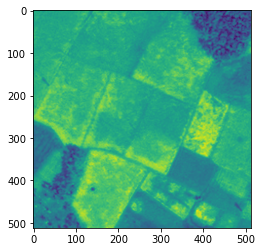

In [5]:
plt.imshow(images[500])

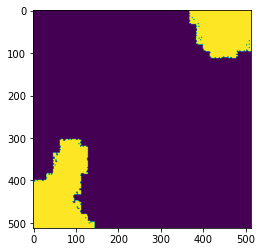

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

5108

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=5018, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
4/4 [==============================] - 30s 5s/step - loss: 1.0722 - dice_coeff: 0.6314 - val_loss: 2.0966 - val_dice_coeff: 0.2586
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 0.9556 - dice_coeff: 0.6649 - val_loss: 1.9744 - val_dice_coeff: 0.2874
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 0.9227 - dice_coeff: 0.6776 - val_loss: 1.8548 - val_dice_coeff: 0.3174
Epoch 4/100
4/4 [==============================] - 6s 2s/step - loss: 0.8712 - dice_coeff: 0.6954 - val_loss: 1.7278 - val_dice_coeff: 0.3506
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 0.8378 - dice_coeff: 0.7086 - val_loss: 1.6361 - val_dice_coeff: 0.3765
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 0.7981 - dice_coeff: 0.7234 - val_loss: 1.5393 - val_dice_coeff: 0.4047
Epoch 7/100
4/4 [==============================] - 6s 2s/step - loss: 0.8208 - dice_coeff: 0.7232 - val_loss: 1.4689 - val_dice_coeff: 0

Epoch 3/100
6/6 [==============================] - 7s 1s/step - loss: 0.2736 - dice_coeff: 0.9013 - val_loss: 0.8742 - val_dice_coeff: 0.7582
Epoch 4/100
6/6 [==============================] - 7s 1s/step - loss: 0.1849 - dice_coeff: 0.9244 - val_loss: 0.8134 - val_dice_coeff: 0.7614
Epoch 5/100
6/6 [==============================] - 8s 1s/step - loss: 0.1835 - dice_coeff: 0.9271 - val_loss: 1.0381 - val_dice_coeff: 0.7431
Epoch 6/100
6/6 [==============================] - 7s 1s/step - loss: 0.3849 - dice_coeff: 0.8716 - val_loss: 1.9376 - val_dice_coeff: 0.5044
Epoch 7/100
6/6 [==============================] - 7s 1s/step - loss: 0.2808 - dice_coeff: 0.8983 - val_loss: 1.0987 - val_dice_coeff: 0.6359
Model saved to /tmp/tmp313usmx2GP2/unet_3.model
History saved to /tmp/tmp313usmx2GP2/history_3.pickle
Testing the classifier...
48/48 [==============================] - 5s 98ms/step - loss: 1.1558 - dice_coeff: 0.6048
Testing the discriminator...
10/10 [==============================] - 0s

In [12]:
R.classifier_scores

[[1.1918267011642456, 0.5157408118247986],
 [2.095766544342041, 0.23426039516925812],
 [1.0203988552093506, 0.7239649891853333],
 [1.155845046043396, 0.6048446297645569],
 [1.052668571472168, 0.7651923298835754]]

In [13]:
R.discriminator_scores

[[0.7091243267059326, 0.9468438625335693],
 [0.6667695045471191, 0.9401993155479431],
 [34.282264709472656, 0.47508305311203003],
 [4.836612224578857, 0.8073089718818665],
 [41.84614944458008, 0.46179401874542236]]

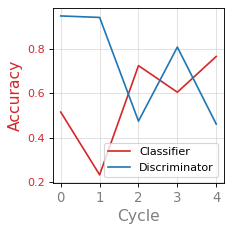

In [14]:
R.plot()